In [ ]:
# Distributions of token counts for all documents in the inferlink eval dataset (full)

import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from src.utils.general import count_tokens

markdown_files_path = "data/processed/43-101-refined"
gt_path = "data/processed/ground_truth/inferlink_ground_truth.csv"

df_gt = pd.read_csv(gt_path)
record_ids = df_gt["cdr_record_id"].tolist()

token_counts = []
processed_files = 0
for file in os.listdir(markdown_files_path):
    file_id = file.split(".")[0]
    if file_id not in record_ids:
        continue
    with open(os.path.join(markdown_files_path, file), "r") as f:
        text = f.read()
        token_count = count_tokens(text)
        token_counts.append(token_count)
        processed_files += 1

Mean token count: 114,606
Median token count: 92,397


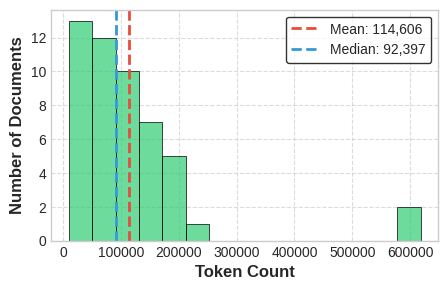

In [3]:
# plot the distribution of token counts using seaborn
plt.figure(figsize=(5, 3))
plt.style.use("seaborn-v0_8-whitegrid")

# Create the histogram with improved styling
sns.histplot(
    token_counts, bins=15, color="#2ecc71", alpha=0.7, edgecolor="black", linewidth=0.5
)

# Calculate statistics
mean_token_count = sum(token_counts) / len(token_counts)
median_token_count = sorted(token_counts)[len(token_counts) // 2]

# Add mean and median lines with improved styling
plt.axvline(
    mean_token_count,
    color="#e74c3c",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {mean_token_count:,.0f}",
)
plt.axvline(
    median_token_count,
    color="#3498db",
    linestyle="--",
    linewidth=2,
    label=f"Median: {median_token_count:,.0f}",
)

# Improve axis labels and title
plt.xlabel("Token Count", fontsize=12, fontweight="bold")
plt.ylabel("Number of Documents", fontsize=12, fontweight="bold")
# plt.title('Distribution of Document Token Counts (Eval Set)', fontsize=14, fontweight='bold', pad=20)

# Improve legend
plt.legend(fontsize=10, frameon=True, facecolor="white", edgecolor="black")

# Add grid with improved styling
plt.grid(True, linestyle="--", alpha=0.7)

# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Print statistics
print(f"Mean token count: {mean_token_count:,.0f}")
print(f"Median token count: {median_token_count:,.0f}")

plt.show()